In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,accuracy_score,confusion_matrix,recall_score,precision_score,f1_score, auc
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression


In [3]:
bank = pd.read_csv("bank-full.csv",sep=";")
bank.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
bank.info

<bound method DataFrame.info of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  d

In [5]:
bank.shape

(45211, 17)

In [6]:
bank.describe

<bound method NDFrame.describe of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact 

In [7]:
bank.corr

<bound method DataFrame.corr of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  d

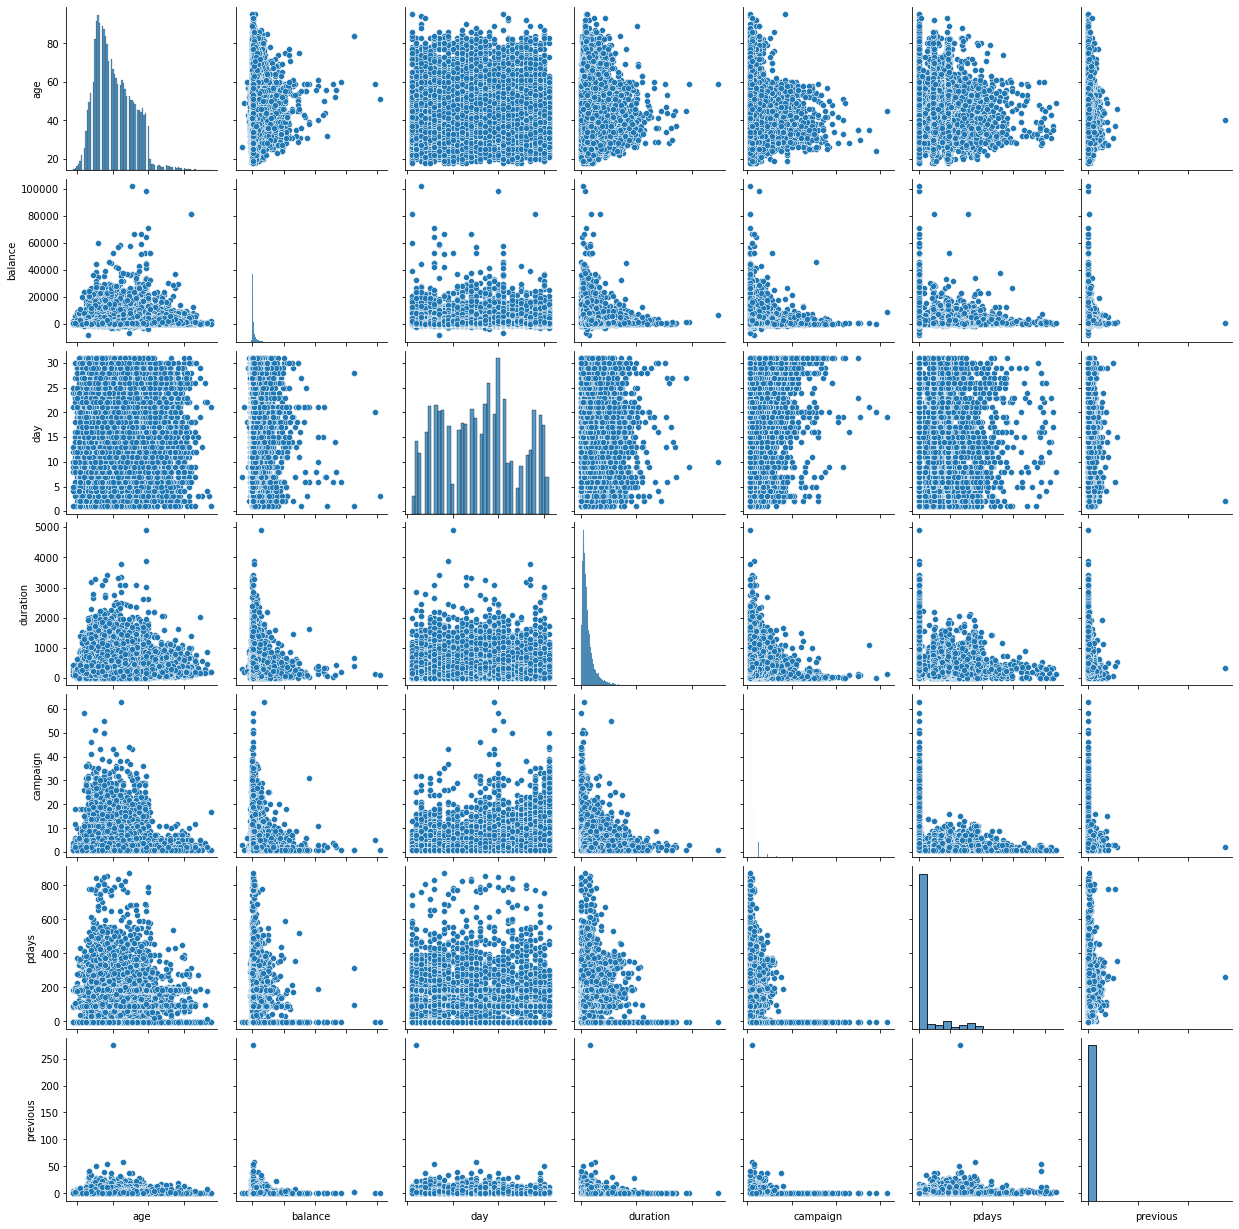

In [10]:
# Visualization
g = sns.pairplot(bank)
g.set(xticklabels=[])
plt.show()


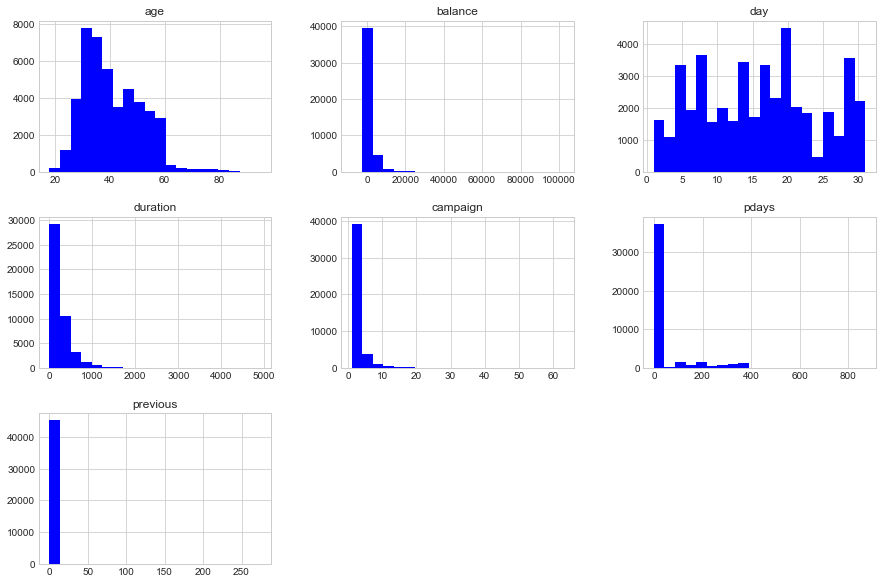

In [11]:
plt.style.use('seaborn-whitegrid')
bank.hist(bins=20, figsize=(15,10), color='blue')
plt.show()


<AxesSubplot:ylabel='y'>

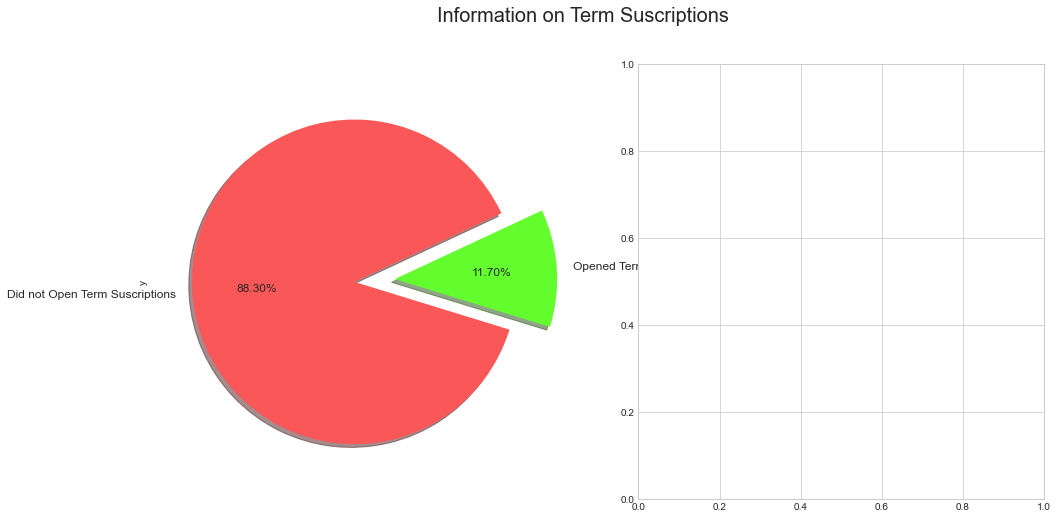

In [12]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#FA5858", "#64FE2E"]
labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"

plt.suptitle('Information on Term Suscriptions', fontsize=20)

bank["y"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)



In [13]:
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)


Text(147.42830515291004, 0.5, '% of Condition of Loans')

<ipython-input-14-7d65fd20b830>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(bank["education"].unique(), rotation=0, rotation_mode="anchor")


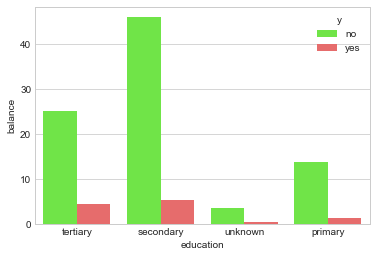

In [14]:
palette = ["#64FE2E", "#FA5858"]

sns.barplot(x="education", y="balance", hue="y", data=bank, palette=palette, estimator=lambda x: len(x) / len(bank) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(bank["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()


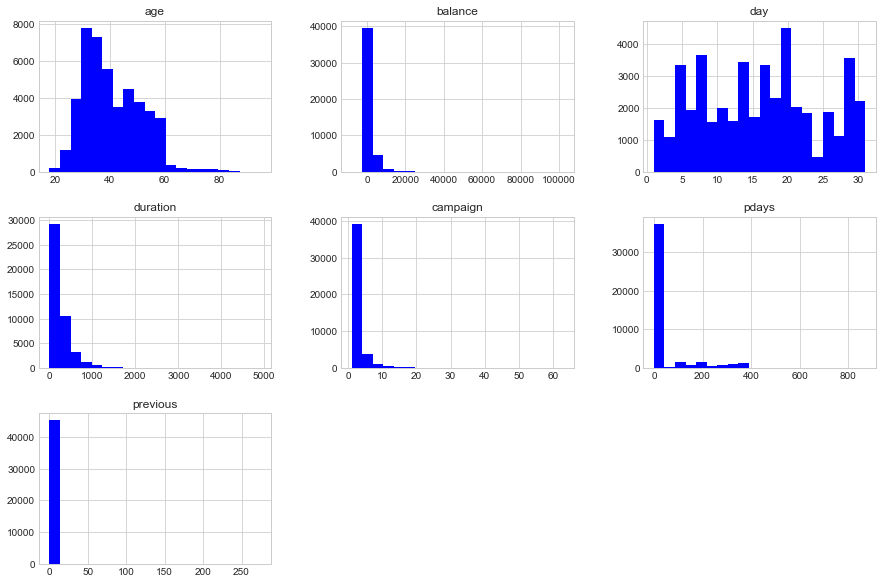

In [12]:
plt.style.use('seaborn-whitegrid')
bank.hist(bins=20, figsize=(15,10), color='blue')
plt.show() 


In [16]:
## Label Encoding 
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
bank["job"] = label_encoder.fit_transform(bank["job"])
bank["marital"] = label_encoder.fit_transform(bank["marital"])
bank["education"] = label_encoder.fit_transform(bank["education"])  
bank["default"] = label_encoder.fit_transform(bank["default"])
bank["housing"] = label_encoder.fit_transform(bank["housing"]) 
bank["loan"] = label_encoder.fit_transform(bank["loan"])
bank["contact"] = label_encoder.fit_transform(bank["contact"])
bank["month"] = label_encoder.fit_transform(bank["month"])
bank["poutcome"] = label_encoder.fit_transform(bank["poutcome"])
bank["y"] = label_encoder.fit_transform(bank["y"])



In [17]:
bank.head(10)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
5,35,4,1,2,0,231,1,0,2,5,8,139,1,-1,0,3,0
6,28,4,2,2,0,447,1,1,2,5,8,217,1,-1,0,3,0
7,42,2,0,2,1,2,1,0,2,5,8,380,1,-1,0,3,0
8,58,5,1,0,0,121,1,0,2,5,8,50,1,-1,0,3,0
9,43,9,2,1,0,593,1,0,2,5,8,55,1,-1,0,3,0


<AxesSubplot:>

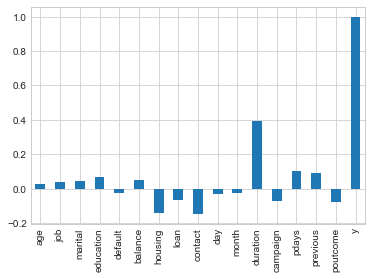

In [18]:
bank.corr()['y'][:].plot.bar()


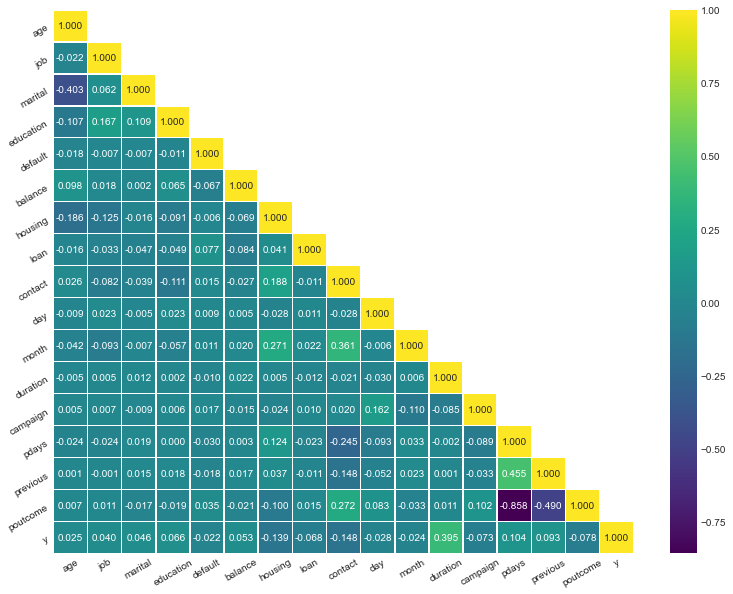

In [19]:
import numpy as np
fig, ax = plt.subplots(figsize=(13,10))

mask = np.zeros_like(bank.corr())
mask[np.triu_indices_from(mask, 1)] = True

sns.heatmap(bank.corr(), annot=True,mask=mask, cmap='viridis',linewidths=0.5,ax=ax, fmt='.3f')

rotx = ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
roty = ax.set_yticklabels(ax.get_yticklabels(), rotation=30)


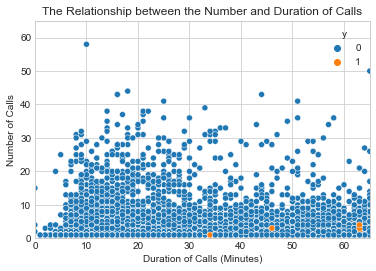

In [20]:
duration_campaign = sns.scatterplot(x='duration', y='campaign',data = bank,
                     hue = 'y')

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls')
plt.show()



In [21]:
# dropping the case number columns as it is not required
bank1= bank.iloc[:,[0,1,2,3,4,5,6,7,16]]


In [22]:
bank1

,age,job,marital,education,default,balance,housing,loan,y
0,58,4,1,2,0,2143,1,0,0
1,44,9,2,1,0,29,1,0,0
2,33,2,1,1,0,2,1,1,0
3,47,1,1,3,0,1506,1,0,0
4,33,11,2,3,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,1
45207,71,5,0,0,0,1729,0,0,1
45208,72,5,1,1,0,5715,0,0,1
45209,57,1,1,1,0,668,0,0,0


In [23]:
bank1.isna().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
y            0
dtype: int64

In [24]:
# Dividing our data into input and output variables 
X = bank1.iloc[:,:-2]
X

,age,job,marital,education,default,balance,housing
0,58,4,1,2,0,2143,1
1,44,9,2,1,0,29,1
2,33,2,1,1,0,2,1
3,47,1,1,3,0,1506,1
4,33,11,2,3,0,1,0
...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0
45207,71,5,0,0,0,1729,0
45208,72,5,1,1,0,5715,0
45209,57,1,1,1,0,668,0


In [25]:
Y = bank1.iloc[:,-1]
Y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [26]:
## Splitting into training and testing model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,Y, test_size=0.3, random_state=0)



In [27]:
print(X_train.shape)


(31647, 7)


In [28]:
print(X_test.shape)

(13564, 7)


In [29]:
from sklearn.linear_model import LogisticRegression
lr_clf=LogisticRegression()
lr_clf.fit(X_train, y_train)


LogisticRegression()

In [30]:
print("Training Accuracy :\t ", lr_clf.score(X_train, y_train))

Training Accuracy :	  0.8831168831168831


In [31]:
print("Testing Accuracy :\t  ",  lr_clf.score(X_test, y_test))


Testing Accuracy :	   0.882114420524919


In [32]:
y_pred = lr_clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
from sklearn import metrics
metrics.confusion_matrix(y_pred, y_test)



array([[11965,  1595],
       [    4,     0]], dtype=int64)

In [34]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print (cm)


[[11965     4]
 [ 1595     0]]


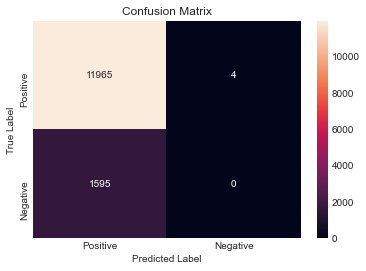

In [35]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
class_label = ["Positive", "Negative"]
cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11969
           1       0.00      0.00      0.00      1595

    accuracy                           0.88     13564
   macro avg       0.44      0.50      0.47     13564
weighted avg       0.78      0.88      0.83     13564



In [37]:
 ## ROC Curve
y_predictProb = lr_clf.predict_proba(X_train)
fpr, tpr, thresholds = roc_curve(y_train, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)
print("auc :-",roc_auc)

auc :- 0.6178915577042453


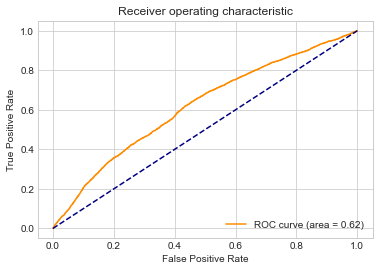

In [41]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")


In [42]:
prob=lr_clf.predict_proba(X_train)
prob=prob[:,1]
new_pred= pd.DataFrame({'actual': y_test,"pred":0})



In [43]:
new_pred

,actual,pred
14001,0,0
32046,1,0
13318,0,0
42991,0,0
14237,0,0
...,...,...
2666,0,0
35730,0,0
11495,0,0
20975,0,0


In [44]:
cm_new=confusion_matrix(new_pred.actual,new_pred.pred)
cm_new

array([[11969,     0],
       [ 1595,     0]], dtype=int64)

In [46]:
print(classification_report(new_pred.actual,new_pred.pred))


              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11969
           1       0.00      0.00      0.00      1595

    accuracy                           0.88     13564
   macro avg       0.44      0.50      0.47     13564
weighted avg       0.78      0.88      0.83     13564



C:\Users\INDIA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
